# <span style="color:black">Plants Seedling Classification</span>

###  Background & Context 

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

###  Objective

- The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.


### Data Description

This dataset contains images of unique plants belonging to 12 different species.

The data file names are:
- images.npy
- Label.csv

Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

#### List of Plant species
- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

**Model building**
- Build Convolution Neural Network - Use different layers in the model


**Model Performance Improvement**
- Comment on model performance 
- Can model performance be improved? check and comment 
- Build another model to implement these improvements Model Performance Improvement

**Model Performance Evaluation**
- Evaluate the model on different performance metrics and comment on the performance and scope of improvement. 
- For example precision, recall, accuracy. 
- Plot confusion matrix for all the models and comment on those. 
- All the metrics should be calculated for every model.

###  Importing Libraries 

In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
# Importing openCV for image processing
import cv2                                                                                       
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
# Importing cv2_imshow from google.patches to display images
#from google.colab.patches import cv2_imshow

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

###   Read the dataset 

In [3]:
# Not using google colab
# Mount Google drive to access the dataset (monkeys_dataset.zip)
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Load the image file of the dataset from local computer
images = np.load('images.npy')

# Load the labels file of the dataset from local computer
labels = pd.read_csv('Labels.csv')

## Step1 - Data Overview 

In [5]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib


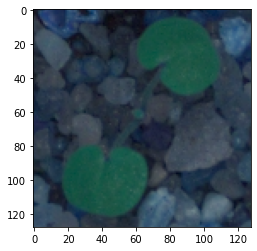

In [6]:
plt.imshow(images[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [7]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## Step2 - Exploratory Data Analysis - EDA

In [8]:
print(np.unique(labels))

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [9]:
print(np.unique(labels).size)

12


In [10]:
# Storing the value counts of target variable
count=labels.Label.value_counts()
print(count)
print('*'*40)
count=labels.Label.value_counts(normalize=True)
print(count)

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64
****************************************
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: Label, dtype: float64


In [11]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

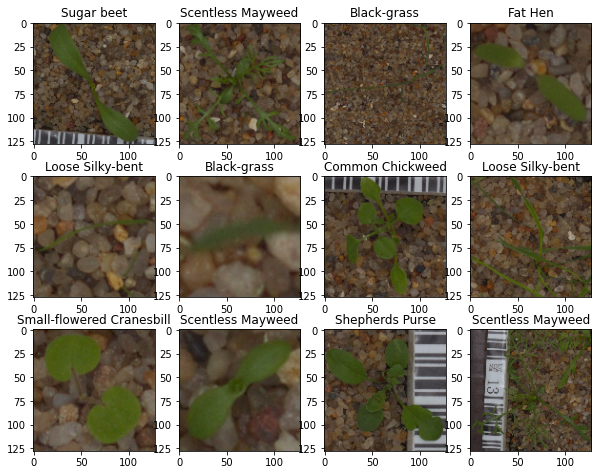

In [12]:
plot_images(images,labels)

<b> Checking for data imbalance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

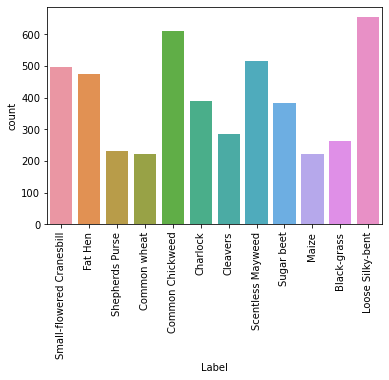

In [13]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

- As you can see from the above plot, the dataset is imbalanced for different categories.
- Following are 5 lowest ones - 
    - Cleavers                     287
    - Black-grass                  263
    - Shepherds Purse              231
    - Common wheat                 221
    - Maize                        221

### Resizing images 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [14]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

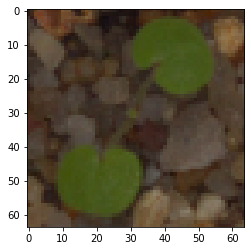

In [15]:
plt.imshow(images_decreased[5])

## Visualizing images using Gaussian Blur 

In [16]:
# Applying Gaussian Blur to denoise the images
# However this can sometimes it miight not improve
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

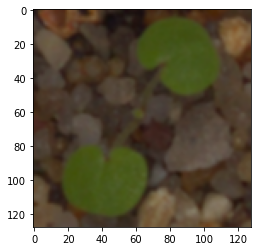

In [17]:
plt.imshow(images_gb[5])

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

<a id='eda'></a>
### <a id='link1'>Executive Summary of EDA</a>

- Gaussian Blur did not help.
- Data is imbalanced for 5 different categories. 
- Reduced the size to 64 from 128 to help compute / model this fast

## Step3. Data Preparation and Model building

## **Step 3.1 - Data Preparation - Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [18]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [19]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values

## Encoding the target labels

In [20]:
### Convert labels from names to one hot vectors.
### We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
### Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [21]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## **Step 3.2- Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

### Model 1

Now, let's build a **CNN Model** with the following 2 main parts - <br>

- **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
- **The Fully Connected classification layers** for prediction.<br><br>

1. Conv2D(64,32) + Max Pooling
2. Flatenning
3. Connected Layer - Dense + Dropout
- Optimizer - Adam
- Loss - categorical crossentropy
- Accuracy
- Epochs - 30

In [29]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [30]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [31]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [32]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30


2022-09-15 11:29:18.359607: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 189087744 exceeds 10% of free system memory.


121/121 - 20s - loss: 2.4512 - accuracy: 0.1326 - val_loss: 2.3727 - val_accuracy: 0.2383 - 20s/epoch - 169ms/step
Epoch 2/30
121/121 - 20s - loss: 2.3048 - accuracy: 0.2191 - val_loss: 2.2072 - val_accuracy: 0.2547 - 20s/epoch - 163ms/step
Epoch 3/30
121/121 - 20s - loss: 2.2296 - accuracy: 0.2230 - val_loss: 2.1623 - val_accuracy: 0.2570 - 20s/epoch - 161ms/step
Epoch 4/30
121/121 - 19s - loss: 2.1587 - accuracy: 0.2300 - val_loss: 2.0663 - val_accuracy: 0.2593 - 19s/epoch - 159ms/step
Epoch 5/30
121/121 - 19s - loss: 2.1365 - accuracy: 0.2173 - val_loss: 2.0341 - val_accuracy: 0.2593 - 19s/epoch - 158ms/step
Epoch 6/30
121/121 - 19s - loss: 2.1410 - accuracy: 0.2373 - val_loss: 2.0128 - val_accuracy: 0.2827 - 19s/epoch - 159ms/step
Epoch 7/30
121/121 - 19s - loss: 2.1019 - accuracy: 0.2534 - val_loss: 1.9688 - val_accuracy: 0.3154 - 19s/epoch - 156ms/step
Epoch 8/30
121/121 - 19s - loss: 2.0692 - accuracy: 0.2612 - val_loss: 1.9563 - val_accuracy: 0.3248 - 19s/epoch - 157ms/step
Epo

### **Model Evaluation**

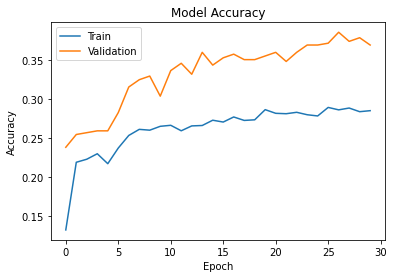

In [33]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

* Overall, validation and training accuracy is very poor.
*   We can see from the above plot that **the training accuracy of the  model is less than the validation set. This model is underfitting.**
*   The model seems to underfit on the data.

### **Evaluating the model on test data**

In [35]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.8419 - accuracy: 0.3684 - 548ms/epoch - 37ms/step


* Accuracy is ver poor for test data

### **Generating the predictions using test data**

In [36]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 1s 39ms/step


In [37]:
y_pred

array([[5.4502305e-02, 1.1021832e-06, 9.3950999e-05, ..., 1.2573651e-03,
        1.0257647e-04, 1.3446547e-01],
       [1.5604568e-02, 1.4770150e-01, 9.2757791e-02, ..., 8.0185391e-02,
        1.8418589e-01, 6.2309727e-02],
       [1.5604568e-02, 1.4770150e-01, 9.2757791e-02, ..., 8.0185391e-02,
        1.8418589e-01, 6.2309727e-02],
       ...,
       [1.9090372e-01, 1.5845900e-10, 5.4055628e-05, ..., 1.8156580e-09,
        7.6223597e-11, 4.0945437e-02],
       [1.5604568e-02, 1.4770150e-01, 9.2757791e-02, ..., 8.0185391e-02,
        1.8418589e-01, 6.2309727e-02],
       [1.5604568e-02, 1.4770150e-01, 9.2757791e-02, ..., 8.0185391e-02,
        1.8418589e-01, 6.2309727e-02]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

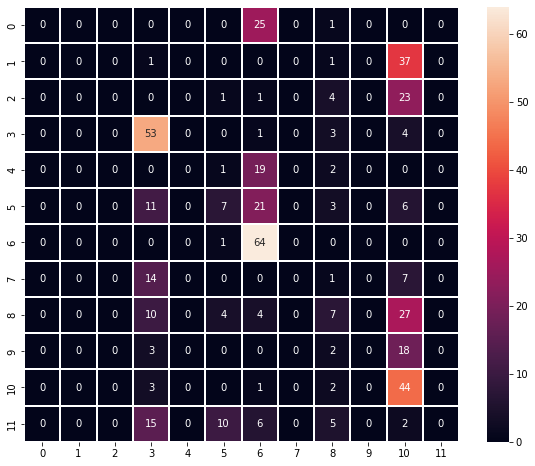

In [38]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that most of the classes are not predicted correctly. 

# Model-2

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

Now, let's build another model ( Model 2)

0. `Data Augmentation` - Rotation 20 degree
1. Conv2D(64,32) + Max Pooling
2. Flatenning
3. Connected Layer - Dense + Dropout
- Optimizer - Adam
- Loss - categorical crossentropy
- Accuracy
- Epochs - 30

In [33]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [34]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [35]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

In [36]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 22s 360ms/step - loss: 2.1838 - accuracy: 0.2006 - val_loss: 2.4236 - val_accuracy: 0.2056
Epoch 2/25
60/60 [==============================] - 22s 365ms/step - loss: 1.7555 - accuracy: 0.3743 - val_loss: 2.2790 - val_accuracy: 0.2780
Epoch 3/25
60/60 [==============================] - 22s 360ms/step - loss: 1.5566 - accuracy: 0.4518 - val_loss: 2.1219 - val_accuracy: 0.3692
Epoch 4/25
60/60 [==============================] - 21s 355ms/step - loss: 1.4021 - accuracy: 0.5041 - val_loss: 2.0797 - val_accuracy: 0.3995
Epoch 5/25
60/60 [==============================] - 22s 361ms/step - loss: 1.3378 - accuracy: 0.5181 - val_loss: 1.8499 - val_accuracy: 0.6028
Epoch 6/25
60/60 [==============================] - 21s 356ms/step - loss: 1.2266 - accuracy: 0.5596 - val_loss: 1.5997 - val_accuracy: 0.5724
Epoch 7/25
60/60 [==============================] - 21s 354ms/step - loss: 1.1721 - accuracy: 0.5789 - val_loss: 1.5470 - val_accuracy: 0.5841

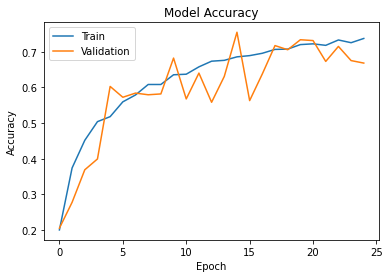

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

* Overall, validation and training accuracy is much better from last model
* We can see from the above plot that **the training accuracy of the  model is almost similar to the validation set.** 
* The model seems to a bit overfiting on the data.

In [38]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.2641 - accuracy: 0.6589 - 509ms/epoch - 34ms/step


In [39]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 1s 37ms/step


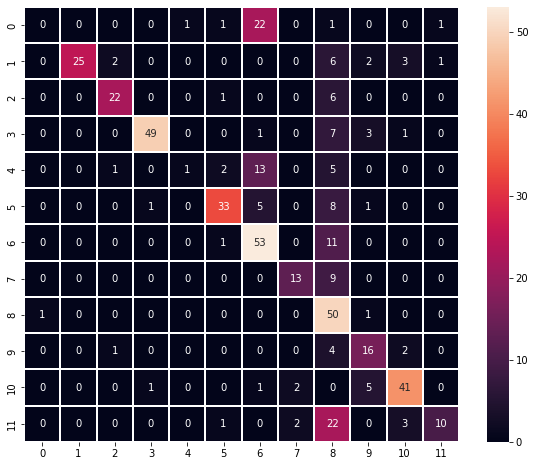

In [40]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**

* The confusion matrix appears to be improving as well, however there is still some confusion with the 6 and 8 classes of monkey species.
* The 8th class is the most confused class among all.
* We can observe that this model has outperformed our previous model.

## **Visualizing the prediction:**

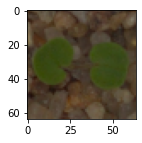

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


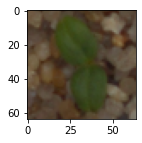

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Cleavers']
True Label Cleavers


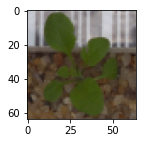

1/1 [==============================] - 0s 22ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [41]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
# reshaping the input image as we are only trying to predict using a single image
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   
# using inverse_transform() to get the output label from the output vector
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**Observation:**

* The visual prediction is great for the above classes. However, as per the confusion matrix , it will have issues with class 6 and 8.

# Model-3 ( Data Augmentation with SGD)

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

**Now, let's build another model ( Model 3 with SGD)**

0. Data Augmentation - Rotation 20 degree
1. Conv2D(64,32) + Max Pooling
2. Flatenning
3. Connected Layer - Dense + Dropout
- Optimizer - **`SGD`**
- Loss - categorical crossentropy
- Accuracy
- Epochs - 25

In [22]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [23]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [25]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)
#opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

In [26]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 24s 397ms/step - loss: 2.3886 - accuracy: 0.1581 - val_loss: 2.4699 - val_accuracy: 0.1379
Epoch 2/25
60/60 [==============================] - 24s 401ms/step - loss: 1.9513 - accuracy: 0.3180 - val_loss: 2.2587 - val_accuracy: 0.1822
Epoch 3/25
60/60 [==============================] - 23s 375ms/step - loss: 1.7370 - accuracy: 0.3690 - val_loss: 2.0373 - val_accuracy: 0.2640
Epoch 4/25
60/60 [==============================] - 22s 363ms/step - loss: 1.6375 - accuracy: 0.4079 - val_loss: 2.9388 - val_accuracy: 0.1752
Epoch 5/25
60/60 [==============================] - 22s 364ms/step - loss: 1.5318 - accuracy: 0.4555 - val_loss: 3.0232 - val_accuracy: 0.1916
Epoch 6/25
60/60 [==============================] - 23s 384ms/step - loss: 1.4612 - accuracy: 0.4840 - val_loss: 2.1186 - val_accuracy: 0.2547
Epoch 7/25
60/60 [==============================] - 22s 373ms/step - loss: 1.4002 - accuracy: 0.5136 - val_loss: 3.2323 - val_accuracy: 0.2850

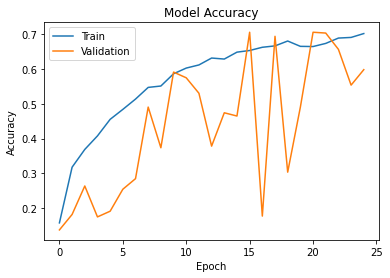

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations**

* The Model accuracy is all over the place. This has accuracy from 20% to 70%. 
* The accuray is not stable and model is overfitting too.

In [28]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.4675 - accuracy: 0.5811 - 489ms/epoch - 33ms/step


In [29]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 1s 35ms/step


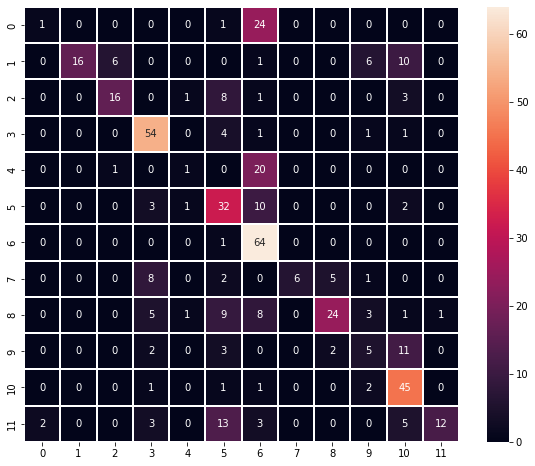

In [30]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**

* The confusion matrix appears to be better than model1, but there are big confusion with the 3,5,6,10 classes.
* We can observe that this model has not outperformed our previous model. 
* Optimizer SGD doesn't appear to be better than ADM.

## **Visualizing the prediction:**

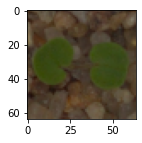

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


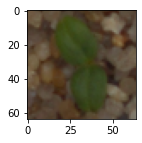

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Cleavers


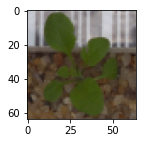

1/1 [==============================] - 0s 20ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [31]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
# reshaping the input image as we are only trying to predict using a single image
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   
# using inverse_transform() to get the output label from the output vector
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**Observation**

* Only 1 class out of 3 is predicted correct.
* SGD optimizer did not perform well even with Data Augemntation.

# Model 4 - Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem

**Now, let's build another model ( Model 3 with SGD)**

1. VGG16 Transfer Learning
2. Flatenning
3. Connected Layer - Dense + Dropout + Dense
- Optimizer - **`ADAM`**
- Loss - categorical crossentropy
- Accuracy
- Epochs - 25

In [51]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

* NUmber of trainable parameters are 14 million, 714K 688.
* Trainable parameters are quite high as compared to other models

In [53]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [54]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-

**Observations**
* After applying fully connected layer and drops out, the total trainable parameters have come down from 14 million to 66,300

In [55]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 86s 1s/step - loss: 2.3584 - accuracy: 0.1885 - val_loss: 2.2676 - val_accuracy: 0.2290
Epoch 2/25
60/60 [==============================] - 90s 2s/step - loss: 2.1703 - accuracy: 0.2675 - val_loss: 2.0512 - val_accuracy: 0.3481
Epoch 3/25
60/60 [==============================] - 85s 1s/step - loss: 1.9680 - accuracy: 0.3394 - val_loss: 1.9199 - val_accuracy: 0.3902
Epoch 4/25
60/60 [==============================] - 86s 1s/step - loss: 1.8264 - accuracy: 0.3746 - val_loss: 1.7849 - val_accuracy: 0.4112
Epoch 5/25
60/60 [==============================] - 86s 1s/step - loss: 1.7050 - accuracy: 0.4134 - val_loss: 1.6612 - val_accuracy: 0.4369
Epoch 6/25
60/60 [==============================] - 87s 1s/step - loss: 1.6176 - accuracy: 0.4375 - val_loss: 1.6033 - val_accuracy: 0.4019
Epoch 7/25
60/60 [==============================] - 85s 1s/step - loss: 1.5158 - accuracy: 0.4798 - val_loss: 1.5150 - val_accuracy: 0.4626
Epoch 8/25
60/60 [==

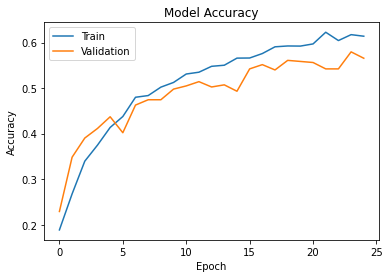

In [56]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations**
* Model accuray for test and validation is very close as compare to other models.
* This model looks more consistent.
* Model accuracy is still overfitting for validation set.
* Performance of model is still very low as compared to model 2.

In [57]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 9s - loss: 1.2149 - accuracy: 0.5874 - 9s/epoch - 582ms/step


In [58]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 9s 587ms/step


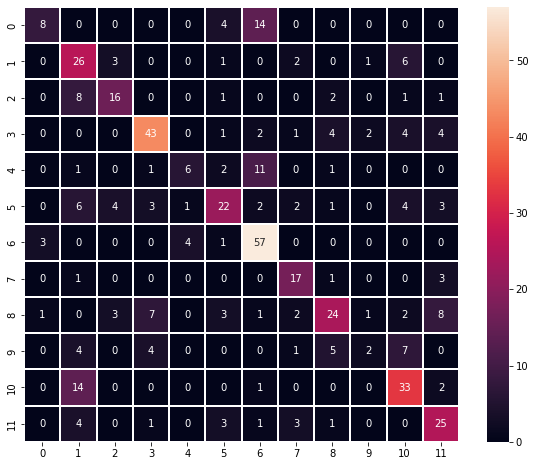

In [59]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observations**

- According to the confusion matrix and accuracy curve, the **VGG16 model is not able to outperforme Model2.**
- There a big confusion around class 1,6, 9, 10 and 11

## **Visualizing the prediction:**

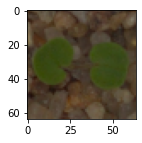

1/1 [==============================] - 0s 49ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


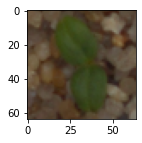

1/1 [==============================] - 0s 44ms/step
Predicted Label ['Cleavers']
True Label Cleavers


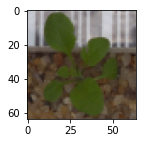

1/1 [==============================] - 0s 42ms/step
Predicted Label ['Charlock']
True Label Shepherds Purse


In [65]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
# reshaping the input image as we are only trying to predict using a single image
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   
# using inverse_transform() to get the output label from the output vector
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**Visual Observation**
* only 2 class can be predicted correctly as compared to Model 2.
* Overall, model will not be performing correclt got couple of classes

## Conclusion

- We can observe from the confusion matrix of all the models that only Model 2 ( With Data Augmentaion) performed the best. 
- VGG16 model was not the best model and was not able to predict the majority of the classes correctly
- The test accuracy of the Model-2 is 65% which is better than VGG16 model.
- Data Augmentation has also helped in improving the model with ADAM optimizer helped a lot.
- VGG16 transfer learning didnot work well with this CNN model. We need to work on optimizing the model further using smoe more hyperparameters.
- Model2 with Data Augmentation and ADAM optimizer woked well highest accuracy as compared to other model.s
- Overll, Model-2 and VGG16 needs more hypertuning to make the results better.


In [44]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','CNN Model Data Augmentation with SGD','Transfer Learning Model'],'Train Accuracy':['36.92%','73.72%','70.18%','61.3%'],'Validation Accuracy':['36.92%','66.82%','59.81%','56.5%'],'Test Accuracy':['36.84%','65.89%','58.11%','58.74%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,36.92%,36.92%,36.84%
1,CNN Model with Data Augmentation,73.72%,66.82%,65.89%
2,CNN Model Data Augmentation with SGD,70.18%,59.81%,58.11%
3,Transfer Learning Model,61.3%,56.5%,58.74%


## Scope of Improvement
- These models can be further improved by training with different filter sizes and different number of filters. 
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.
- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.
- We can play with different optimizers. As we saw SGD performed really bad as compared to ADAM
- We should focus on bact normalization , epochs and other hyper parameters tuning.

# <span style="color:black">End of Plants Seedling Classification</span>